# EDA

In [1]:
import pandas as pd

In [2]:
df_customer = pd.read_csv('./customers.csv')

In [3]:
from pandas_profiling import ProfileReport

In [4]:
ProfileReport(df_customer)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df_customer_pivot = pd.pivot_table(
    data=df_customer,
    values = 'customer_id', 
    columns='freq_cat',
    index='age_cat',
    aggfunc='count',
)

In [6]:
df_customer_pivot

freq_cat,freq0,freq1,freq2,freq3~
age_cat,,,,
age20~34,600,450,150,300
age35~49,800,600,200,400
age50~,400,300,100,200
age~19,200,150,50,100


In [7]:
df_customer_pivot = df_customer_pivot.reindex(['age~19', 'age20~34', 'age35~49', 'age50~'])

In [8]:
df_customer_pivot

freq_cat,freq0,freq1,freq2,freq3~
age_cat,,,,
age~19,200,150,50,100
age20~34,600,450,150,300
age35~49,800,600,200,400
age50~,400,300,100,200


In [9]:
import seaborn as sns

<AxesSubplot:xlabel='freq_cat', ylabel='age_cat'>

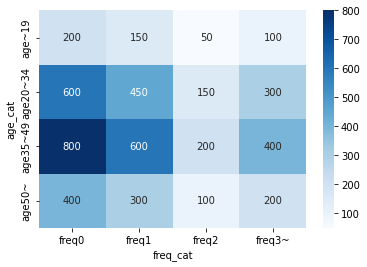

In [10]:
%matplotlib inline
sns.heatmap(df_customer_pivot, annot=True, fmt='d', cmap='Blues')

In [11]:
df_visit_prob = pd.read_csv('./visit_probability.csv')

In [12]:
df_visit_prob

,age_cat,freq_cat,segment_id,prob_dm1,prob_dm2,prob_dm3
0,age~19,freq0,1,0.07,0.12,0.29
1,age~19,freq1,2,0.21,0.30,0.58
2,age~19,freq2,3,0.28,0.39,0.74
3,age~19,freq3~,4,0.35,0.45,0.77
4,age20~34,freq0,5,0.11,0.17,0.37
5,age20~34,freq1,6,0.32,0.43,0.72
6,age20~34,freq2,7,0.42,0.55,0.93
7,age20~34,freq3~,8,0.52,0.63,0.94
8,age35~49,freq0,9,0.08,0.14,0.33
9,age35~49,freq1,10,0.25,0.35,0.67


In [13]:
import matplotlib.pyplot as plt

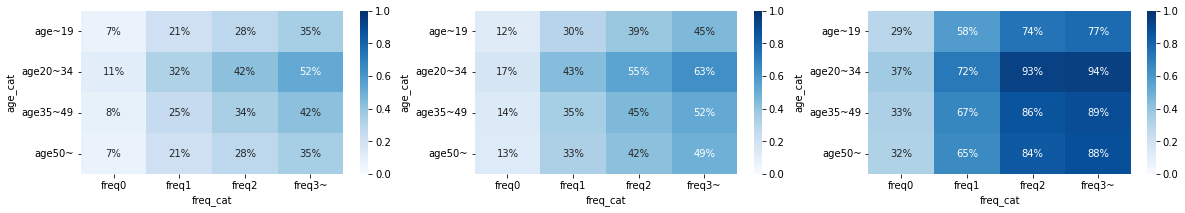

In [14]:
ax = {}
fig, (ax[0], ax[1], ax[2]) = plt.subplots(1, 3, figsize=(20, 3))
for i, ptn in enumerate(['prob_dm1', 'prob_dm2', 'prob_dm3']):
    df_prob_pivot = pd.pivot_table(data=df_visit_prob, values=ptn, columns='freq_cat', index='age_cat')
    df_prob_pivot = df_prob_pivot.reindex(['age~19', 'age20~34', 'age35~49', 'age50~'])
    sns.heatmap(df_prob_pivot, vmin=0, vmax=1, annot=True, fmt='.0%', cmap='Blues', ax=ax[i])

# Optimization

In [15]:
import pulp

In [16]:
problem = pulp.LpProblem(name='DiscountCouponVisitsMaximizationProblem',
                         sense=pulp.LpMaximize)

In [17]:
customers = df_customer.customer_id.to_list()

In [18]:
mail_patterns = [0, 1000, 2000]

In [19]:
x_customer_mail = {}
for customer in customers:
    for mail_pattern in mail_patterns:
        x_customer_mail[customer, mail_pattern] = pulp.LpVariable(name=f'xim({customer}, {mail_pattern})', cat='Binary')

In [20]:
len(x_customer_mail)

15000

In [21]:
for customer in customers:
    problem += pulp.lpSum(x_customer_mail[customer, mail_pattern] for mail_pattern in mail_patterns) == 1

In [22]:
df_customer_prob = pd.merge(df_customer, df_visit_prob, on=['age_cat', 'freq_cat'])

In [23]:
df_customer_prob.sort_values(by='customer_id')

,customer_id,age_cat,freq_cat,segment_id,prob_dm1,prob_dm2,prob_dm3
0,1,age20~34,freq2,7,0.42,0.55,0.93
150,2,age35~49,freq0,9,0.08,0.14,0.33
151,3,age35~49,freq0,9,0.08,0.14,0.33
950,4,age~19,freq0,1,0.07,0.12,0.29
152,5,age35~49,freq0,9,0.08,0.14,0.33
...,...,...,...,...,...,...,...
2948,4996,age50~,freq0,13,0.07,0.13,0.32
2949,4997,age50~,freq0,13,0.07,0.13,0.32
2349,4998,age35~49,freq1,10,0.25,0.35,0.67
4249,4999,age50~,freq1,14,0.21,0.33,0.65


In [24]:
df_customer_prob = df_customer_prob.rename(columns={
    'prob_dm1': 0,
    'prob_dm2': 1000,
    'prob_dm3': 2000,    
})

In [25]:
df_customer_prob

,customer_id,age_cat,freq_cat,segment_id,0,1000,2000
0,1,age20~34,freq2,7,0.42,0.55,0.93
1,199,age20~34,freq2,7,0.42,0.55,0.93
2,200,age20~34,freq2,7,0.42,0.55,0.93
3,255,age20~34,freq2,7,0.42,0.55,0.93
4,269,age20~34,freq2,7,0.42,0.55,0.93
...,...,...,...,...,...,...,...
4995,4474,age~19,freq2,3,0.28,0.39,0.74
4996,4596,age~19,freq2,3,0.28,0.39,0.74
4997,4720,age~19,freq2,3,0.28,0.39,0.74
4998,4910,age~19,freq2,3,0.28,0.39,0.74


In [26]:
_df_customer_prob = df_customer_prob.melt(
    id_vars=['customer_id'],
    value_vars=[0, 1000, 2000],
    var_name='coupon',
    value_name='visit_prob'
)

In [27]:
_df_customer_prob

,customer_id,coupon,visit_prob
0,1,0,0.42
1,199,0,0.42
2,200,0,0.42
3,255,0,0.42
4,269,0,0.42
...,...,...,...
14995,4474,2000,0.74
14996,4596,2000,0.74
14997,4720,2000,0.74
14998,4910,2000,0.74


In [28]:
customer_mail_visit_dict = _df_customer_prob.set_index(['customer_id', 'coupon'])['visit_prob'].to_dict()

In [29]:
customer_mail_visit_dict[1, 0]

0.42

In [30]:
problem += pulp.lpSum((customer_mail_visit_dict[c, m] - customer_mail_visit_dict[c, 0]) * x_customer_mail[c, m] \
                      for c in customers for m in [1000, 2000])

In [31]:
cost_dict = {0: 0, 1000: 1000, 2000: 2000}
problem += pulp.lpSum(cost_dict[m] * customer_mail_visit_dict[c, m] * x_customer_mail[c, m] for c in customers for m in [1000, 2000]) <= 1000000

In [32]:
# セグメントのリスト
segments = df_visit_prob['segment_id'].to_list()

In [33]:
len(segments)

16

In [34]:
segment_uu_count = df_customer_prob.groupby('segment_id')['customer_id'].count().to_dict()

In [35]:
customer_segment_dict = df_customer_prob.set_index('customer_id')['segment_id'].to_dict()

In [36]:
for segment in segments:
    for mail in mail_patterns:
        problem += pulp.lpSum(x_customer_mail[c, mail] for c in customers if customer_segment_dict[c] == segment) >= 0.1 * segment_uu_count[segment]

In [37]:
%timeit
status = problem.solve()

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/jianghui.ouyang/repository/PyOptBook/venv/lib/python3.8/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/_x/r6xc9__d50sgdr9y8zj5bc5nbq0vnj/T/f4abc466c9734c929f23dae07b37ba8d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/_x/r6xc9__d50sgdr9y8zj5bc5nbq0vnj/T/f4abc466c9734c929f23dae07b37ba8d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 5054 COLUMNS
At line 85055 RHS
At line 90105 BOUNDS
At line 105106 ENDATA
Problem MODEL has 5049 rows, 15000 columns and 40000 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 326.095 - 0.19 seconds
Cgl0004I processed model has 5049 rows, 15000 columns (15000 integer (15000 of which binary)) and 40000 elements
Cutoff increment increased fr

In [38]:
pulp.LpStatus[status]

'Optimal'

In [39]:
pulp.value(problem.objective)

326.0900000000025

In [40]:
df_mail_result = pd.DataFrame(
    [[x_customer_mail[c, m].value() for m in mail_patterns] for c in customers],
    columns = ['send_coupon0', 'send_coupon1000', 'send_coupon2000']
)

In [41]:
df_mail_result

,send_coupon0,send_coupon1000,send_coupon2000
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
4995,0.0,1.0,0.0
4996,0.0,0.0,1.0
4997,1.0,0.0,0.0
4998,1.0,0.0,0.0


In [42]:
df_mail_result = pd.concat(
    [df_customer[['customer_id', 'age_cat', 'freq_cat']],
    df_mail_result],
    axis=1
)

In [43]:
df_mail_result

,customer_id,age_cat,freq_cat,send_coupon0,send_coupon1000,send_coupon2000
0,1,age20~34,freq2,0.0,1.0,0.0
1,2,age35~49,freq0,0.0,1.0,0.0
2,3,age35~49,freq0,0.0,1.0,0.0
3,4,age~19,freq0,0.0,1.0,0.0
4,5,age35~49,freq0,0.0,1.0,0.0
...,...,...,...,...,...,...
4995,4996,age50~,freq0,0.0,1.0,0.0
4996,4997,age50~,freq0,0.0,0.0,1.0
4997,4998,age35~49,freq1,1.0,0.0,0.0
4998,4999,age50~,freq1,1.0,0.0,0.0


In [44]:
df_mail_result.sum()

customer_id                                                 12502500
age_cat            age20~34age35~49age35~49age~19age35~49age20~34...
freq_cat           freq2freq0freq0freq0freq0freq1freq1freq0freq0f...
send_coupon0                                                  3020.0
send_coupon1000                                               1271.0
send_coupon2000                                                709.0
dtype: object

# 検証

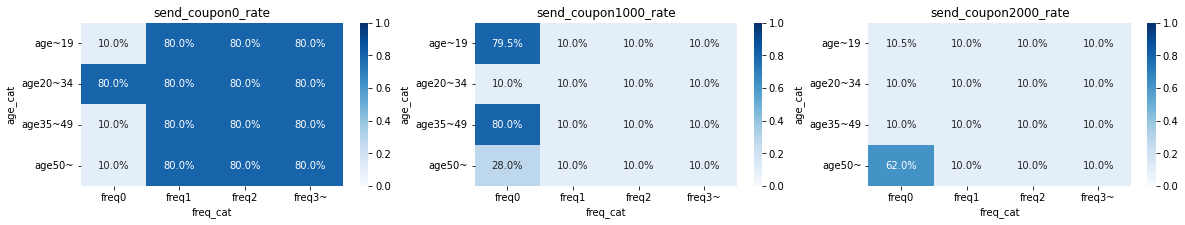

In [45]:
ax = {}
fig, (ax[0], ax[1], ax[2]) = plt.subplots(1, 3, figsize=(20, 3))
for i, ptn in enumerate(['send_coupon0', 'send_coupon1000', 'send_coupon2000']):
    df_send_coupon_pivot = pd.pivot_table(
        data=df_mail_result,
        values=ptn,
        columns='freq_cat',
        index='age_cat',
        aggfunc='mean',
    )
    df_send_coupon_pivot = df_send_coupon_pivot.reindex(['age~19', 'age20~34', 'age35~49', 'age50~'])
    sns.heatmap(df_send_coupon_pivot, annot=True, fmt='.1%', cmap='Blues', vmin=0, vmax=1, ax=ax[i])
    ax[i].set_title(f'{ptn}_rate')

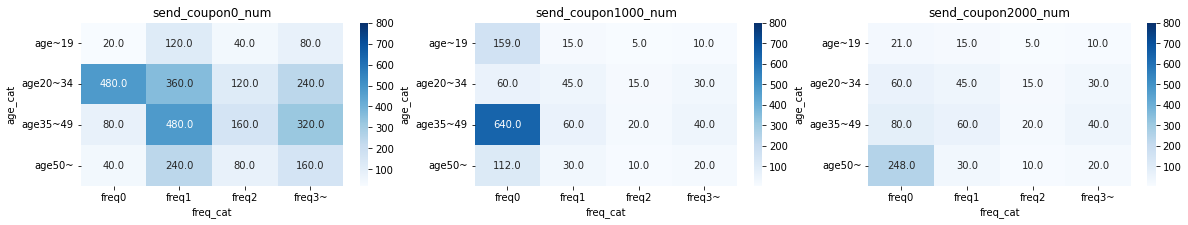

In [46]:
ax = {}
fig, (ax[0], ax[1], ax[2]) = plt.subplots(1, 3, figsize=(20, 3))
for i, ptn in enumerate(['send_coupon0', 'send_coupon1000', 'send_coupon2000']):
    df_send_coupon_pivot = pd.pivot_table(
        data=df_mail_result,
        values=ptn,
        columns='freq_cat',
        index='age_cat',
        aggfunc='sum',
    )
    df_send_coupon_pivot = df_send_coupon_pivot.reindex(['age~19', 'age20~34', 'age35~49', 'age50~'])
    sns.heatmap(df_send_coupon_pivot, annot=True, fmt='.1f', cmap='Blues', vmax=800, ax=ax[i])
    ax[i].set_title(f'{ptn}_num')

# Modeling2: セグメント送付モデル

In [47]:
problem = pulp.LpProblem(
    name="DiscountCouponProblem2",
    sense=pulp.LpMaximize)

In [48]:
# 各会員に対してどのパターンのダイレクトメールを送付するかを決定
x_segment_mail = {}
for s in segments:
    for m in mail_patterns:
        x_segment_mail[s, m] = pulp.LpVariable(
            name=f'xsm({s}, {m})',
            lowBound=0,
            upBound=1,
            cat='Continuous',
        )

In [49]:
len(x_segment_mail)

48

In [50]:
# 各会員に対して送付するダイレクトメールはいずれか1パターン
for s in segments:
    problem += pulp.lpSum(x_segment_mail[s, m] for m in mail_patterns) == 1

In [51]:
_df_segment_prob = df_customer_prob.melt(
    id_vars=['segment_id'],
    value_vars=[0, 1000, 2000],
    var_name='dm',
    value_name='prob'
)

In [52]:
Psm = _df_segment_prob.set_index(['segment_id', 'dm'])['prob'].to_dict()

In [53]:
# クーポン付与による来客増加数を最大化
problem += pulp.lpSum((Psm[s, m] - Psm[s, 0]) * segment_uu_count[s] * x_segment_mail[s, m]
                      for s in segments for m in [1000, 2000])

In [54]:
# 会員の予算消費期待値の合計は100万円以下
problem += pulp.lpSum(
    m * segment_uu_count[s] * x_segment_mail[s, m] * Psm[s, m]
    for s in segments for m in [1000, 2000]
) <= 1000000

In [60]:
# 各パターンのダイレクトメールをそれぞれのセグメントに属する会員数の10%以上送付
for s in segments:
    for m in mail_patterns:
        problem += x_segment_mail[s, m] >= 0.1

In [61]:
%time
status = problem.solve()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/jianghui.ouyang/repository/PyOptBook/venv/lib/python3.8/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/_x/r6xc9__d50sgdr9y8zj5bc5nbq0vnj/T/1dd8978927594795a51563186b07cff4-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/_x/r6xc9__d50sgdr9y8zj5bc5nbq0vnj/T/1dd8978927594795a51563186b07cff4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 118 COLUMNS
At line 423 RHS
At line 537 BOUNDS
At line 634 ENDATA
Problem MODEL has 113 rows, 96 columns and 176 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 326.095 - 0.00 seconds
Cgl0004I processed model has 17 rows, 32 columns (0 integer (0 of which binary)) and 64 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node

In [62]:
status

1

In [63]:
pulp.value(problem.objective)

326.09509792000006

In [65]:
df_dm_result = pd.DataFrame(
    [[x_segment_mail[s, m].value() for m in mail_patterns] for s in segments],
    columns=['prob_dm1', 'prob_dm2', 'prob_dm3']
)

In [74]:
df_send_seg = pd.concat([df_visit_prob[['segment_id', 'age_cat', 'freq_cat']], df_dm_result], axis=1)

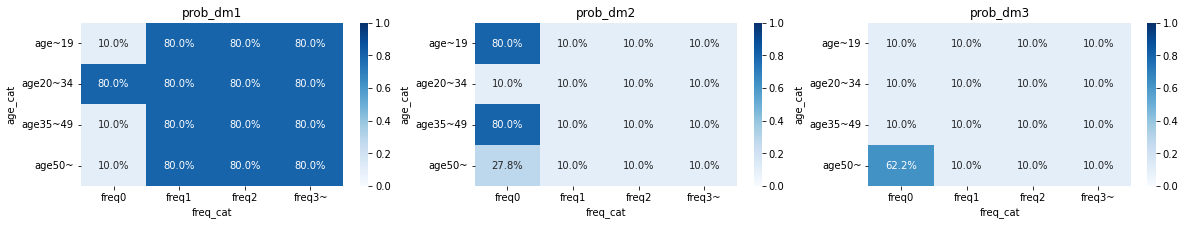

In [83]:
ax = {}
fig, (ax[0], ax[1], ax[2]) = plt.subplots(1, 3, figsize=(20, 3))
for i, ptn in enumerate(['prob_dm1', 'prob_dm2', 'prob_dm3']):
    _df_pivot = pd.pivot_table(
        data=df_send_seg,
        values=ptn,
        columns='freq_cat',
        index='age_cat',
        aggfunc='mean'
    )
    _df_pivot = _df_pivot.reindex(['age~19', 'age20~34', 'age35~49', 'age50~'])
    sns.heatmap(_df_pivot, annot=True, fmt='.1%', cmap='Blues', vmin=0, vmax=1, ax=ax[i])
    ax[i].set_title(f'{ptn}')

In [85]:
segment_uu_count

{1: 200,
 2: 150,
 3: 50,
 4: 100,
 5: 600,
 6: 450,
 7: 150,
 8: 300,
 9: 800,
 10: 600,
 11: 200,
 12: 400,
 13: 400,
 14: 300,
 15: 100,
 16: 200}

In [93]:
df_send_seg['num_customer'] = df_send_seg['segment_id'].apply(lambda x: segment_uu_count[x])

In [96]:
df_send_seg['num_dm1'] = df_send_seg['prob_dm1'] * df_send_seg['num_customer']
df_send_seg['num_dm2'] = df_send_seg['prob_dm2'] * df_send_seg['num_customer']
df_send_seg['num_dm3'] = df_send_seg['prob_dm3'] * df_send_seg['num_customer']

In [98]:
df_send_seg.head(3)

,segment_id,age_cat,freq_cat,prob_dm1,prob_dm2,prob_dm3,num_customer,num_dm1,num_dm2,num_dm3
0,1,age~19,freq0,0.1,0.8,0.1,200,20.0,160.0,20.0
1,2,age~19,freq1,0.8,0.1,0.1,150,120.0,15.0,15.0
2,3,age~19,freq2,0.8,0.1,0.1,50,40.0,5.0,5.0


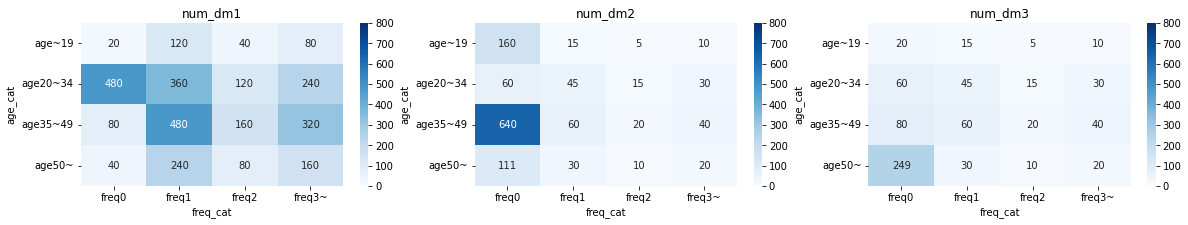

In [100]:
ax = {}
fig, (ax[0], ax[1], ax[2]) = plt.subplots(1, 3, figsize=(20, 3))
for i, ptn in enumerate(['num_dm1', 'num_dm2', 'num_dm3']):
    _df_pivot = pd.pivot_table(
        data=df_send_seg,
        values=ptn,
        columns='freq_cat',
        index='age_cat',
    )
    _df_pivot = _df_pivot.reindex(['age~19', 'age20~34', 'age35~49', 'age50~'])
    sns.heatmap(_df_pivot, annot=True, fmt='.0f', cmap='Blues', vmin=0, vmax=800, ax=ax[i])
    ax[i].set_title(f'{ptn}')

# Modeling3: 送付率下限値を最大化モデル

In [121]:
problem = pulp.LpProblem(
    name='DiscountCouponProblem3',
    sense=pulp.LpMaximize,
)

In [122]:
# 各セグメントへのそれぞれパターンのダイレクトメールの送付率の下限値と
# 各会員に対してどのダイレクトメールを送付するかを決定

xsm = {}
for s in segments:
    for m in mail_patterns:
        xsm[s, m] = pulp.LpVariable(
            name=f'xsm({s}, {m})',
            lowBound=0,
            upBound=1,
            cat='Continuous',
        )
# 各セグメントへのそれぞれパターンのダイレクトメールの送付率の下限値
y = pulp.LpVariable(
    name='y',
    lowBound=0,
    upBound=1,
    cat='Continuous',
)

In [123]:
# 各セグメントへのそれぞれパターンのダイレクトメールの送付率の下限値を最大化
problem += y

In [124]:
# 各パターンのダイレクトメールを設定した送付率の下限値以上送付
for s in segments:
    for m in mail_patterns:
        problem += xsm[s, m] >= y

In [125]:
# 各会員に対して送付するダイレクトメールはいずれか1パターン
for s in segments:
    problem += pulp.lpSum(xsm[s, m] for m in mail_patterns) == 1

In [126]:
# 会員の予算消費期待値の合計は100万円以下
problem += pulp.lpSum(
    m * segment_uu_count[s] * Psm[s, m] * xsm[s, m]
    for s in segments for m in [1000, 2000]
) <= 1000000

In [127]:
status = problem.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/jianghui.ouyang/repository/PyOptBook/venv/lib/python3.8/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/_x/r6xc9__d50sgdr9y8zj5bc5nbq0vnj/T/064b25aeca114b04a42704a4ec9795da-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/_x/r6xc9__d50sgdr9y8zj5bc5nbq0vnj/T/064b25aeca114b04a42704a4ec9795da-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 70 COLUMNS
At line 248 RHS
At line 314 BOUNDS
At line 364 ENDATA
Problem MODEL has 65 rows, 49 columns and 176 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 49 (-16) rows, 33 (-16) columns and 144 (-32) elements
Perturbing problem by 0.001% of 0.62819912 - largest nonzero change 0.00094529304 ( 0.15047666%) - largest zero change 9.6171668e-05
0  Obj -0 Dual inf 0.62725282 (1)
31  Obj 0.13116342 Primal inf 0.17027776 (2)
33 

In [129]:
pulp.value(problem.objective)

0.13125943

In [136]:
df_dm_result = pd.DataFrame(
    [[xsm[s, m].value() for m in mail_patterns] for s in segments],
    columns=['prob_dm1', 'prob_dm2', 'prob_dm3']
)

In [137]:
df_send_seg = pd.concat([df_visit_prob[['segment_id', 'age_cat', 'freq_cat']], df_dm_result], axis=1)

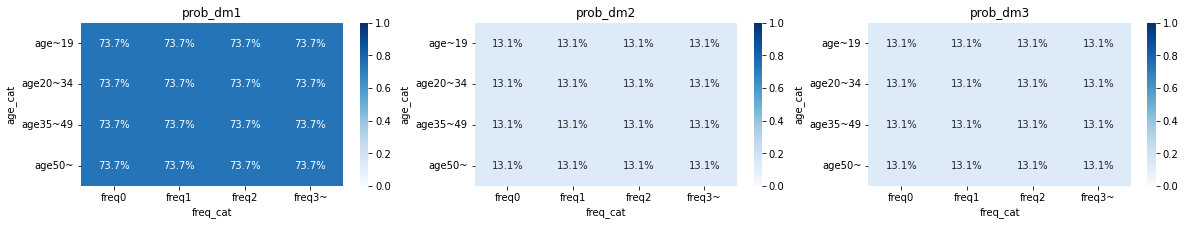

In [139]:
ax = {}
fig, (ax[0], ax[1], ax[2]) = plt.subplots(1, 3, figsize=(20, 3))
for i, ptn in enumerate(['prob_dm1', 'prob_dm2', 'prob_dm3']):
    _df_pivot = pd.pivot_table(
        data=df_send_seg,
        values=ptn,
        columns='freq_cat',
        index='age_cat',
        aggfunc='mean'
    )
    _df_pivot = _df_pivot.reindex(['age~19', 'age20~34', 'age35~49', 'age50~'])
    sns.heatmap(_df_pivot, annot=True, fmt='.1%', cmap='Blues', vmin=0, vmax=1, ax=ax[i])
    ax[i].set_title(f'{ptn}')

In [145]:
visit_lift = 0
for s in segments:
    for m in mail_patterns:
        visit_lift += (Psm[s, m] - Psm[s, 0]) * segment_uu_count[s] * xsm[s, m]

In [146]:
pulp.value(visit_lift)

300.5840947000001

# 投資対効果の評価

In [162]:
cost_list = []
cpa_list = []
inc_actioin_list = []

In [163]:
cpa_result = []
for cost in range(761850, 3000000, 100000):
    result = {}
    problem = pulp.LpProblem(name='DiscountCouponCpa', sense=pulp.LpMaximize)
    
    xsm = {}
    for s in segments:
        for m in mail_patterns:
            xsm[s, m] = pulp.LpVariable(
                name=f'xsm({s}, {m})',
                lowBound=0,
                upBound=1,
                cat='Continuous',
            )
    for s in segments:
        problem += pulp.lpSum(xsm[s, m] for m in mail_patterns) == 1
    
    problem += pulp.lpSum(segment_uu_count[s] * (Psm[s, m] - Psm[s, 0]) * xsm[s, m]
                          for s in segments
                          for m in [1000, 2000]
                         )
    problem += pulp.lpSum(m * segment_uu_count[s] * Psm[s, m] * xsm[s, m]
                          for s in segments
                          for m in [1000, 2000]
                         ) <= cost
    # for s in segments:
    #     for m in mail_patterns:
    #         problem += xsm[s, m] >= 0.1
    
    status = problem.solve()
    cpa = cost / pulp.value(problem.objective)
    inc_action = pulp.value(problem.objective)
    
    result['cost'] = cost
    result['cpa'] = cpa
    result['inc_action'] = inc_action
    cpa_result.append(result)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/jianghui.ouyang/repository/PyOptBook/venv/lib/python3.8/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/_x/r6xc9__d50sgdr9y8zj5bc5nbq0vnj/T/da61c2e3eeb74ab2b57eb18fd7b25a45-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/_x/r6xc9__d50sgdr9y8zj5bc5nbq0vnj/T/da61c2e3eeb74ab2b57eb18fd7b25a45-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 22 COLUMNS
At line 135 RHS
At line 153 BOUNDS
At line 202 ENDATA
Problem MODEL has 17 rows, 48 columns and 80 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 17 (0) rows, 32 (-16) columns and 64 (-16) elements
0  Obj -0 Dual inf 981.57657 (32)
4  Obj 293.52212
Optimal - objective value 293.52212
After Postsolve, objective 293.52212, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 293.5221154 - 4 iterations time 0

In [164]:
df_cpa_result = pd.DataFrame(cpa_result)

In [165]:
import matplotlib.ticker as ticker

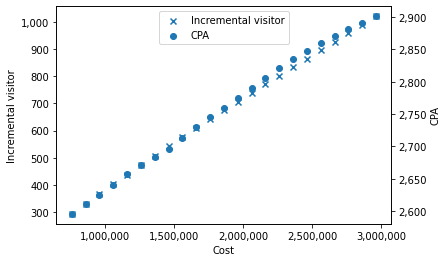

In [166]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter(
    df_cpa_result.cost,
    df_cpa_result.inc_action,
    marker='x',
    label='Incremental visitor'
)
ax2.scatter(
    df_cpa_result.cost,
    df_cpa_result.cpa,
    label='CPA'
)
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x :,.0f}'))
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x :,.0f}'))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x :,.0f}'))
ax1.set_xlabel('Cost')
ax1.set_ylabel('Incremental visitor')
ax2.set_ylabel('CPA')
reg1, label1 = ax1.get_legend_handles_labels()
reg2, label2 = ax2.get_legend_handles_labels()
ax2.legend(reg1 + reg2, label1 + label2, loc='upper center')
plt.show()